# 线性回归（优化器：Gradient Descent）。

In [4]:
import numpy as np


class LinearRegression:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y) ** 2)
            self.cost_history.append(cost)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



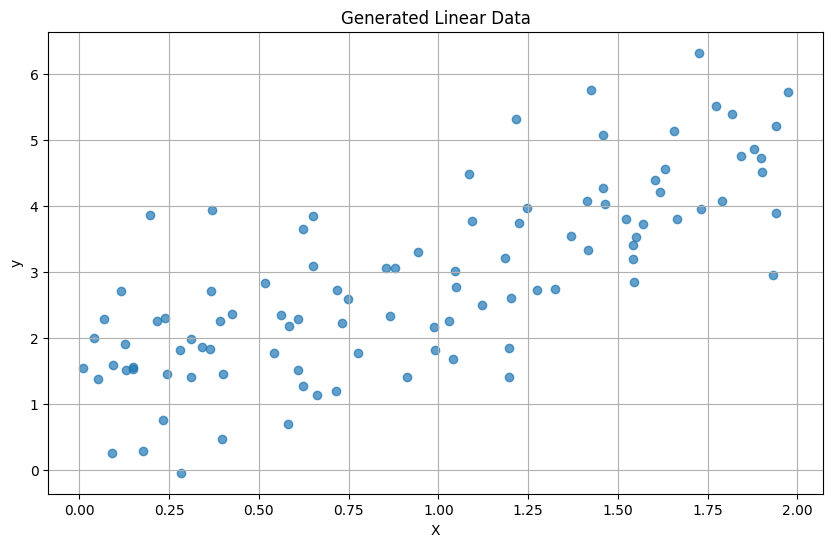

In [2]:
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

y = y.ravel()
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.title("Generated Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [6]:
regressor = LinearRegression(0.01, 1000)
regressor.fit(X, y)
print("\n--- Training Finished ---")
print(f"Learned Weights: {regressor.weights[0]:.4f}")
print(f"Learned Bias: {regressor.bias:.4f}")


--- Training Finished ---
Learned Weights: 1.7385
Learned Bias: 1.2509


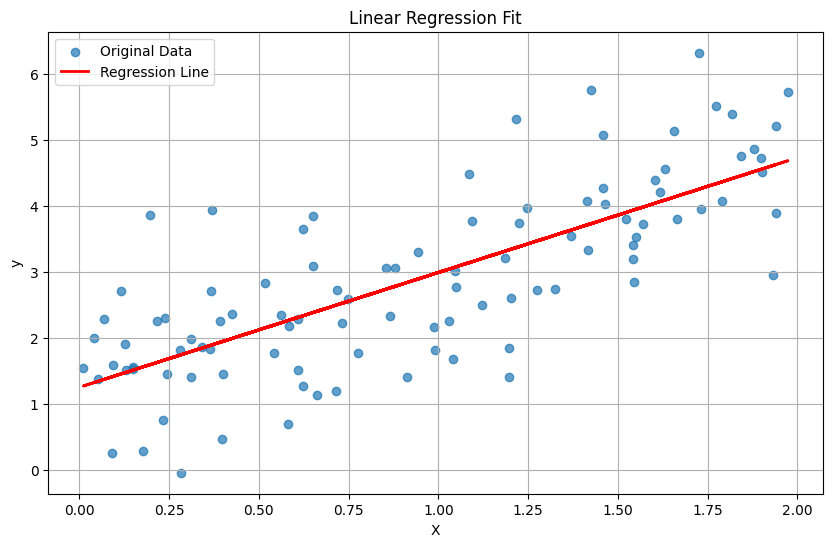

In [7]:
# 进行预测
y_predicted = regressor.predict(X)

# 绘制回归线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Original Data')
plt.plot(X, y_predicted, color='red', linewidth=2, label='Regression Line')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

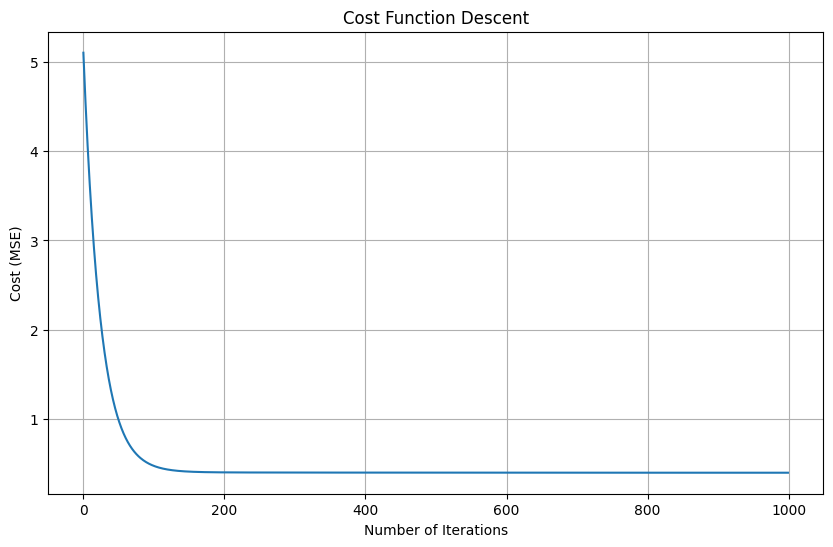

In [8]:
# 绘制成本函数历史
plt.figure(figsize=(10, 6))
plt.plot(range(regressor.n_iters), regressor.cost_history)
plt.title("Cost Function Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

Of course. Here is the step-by-step derivation of the partial derivatives for the Mean Squared Error (MSE) cost function with respect to its parameters, weight ($w$) and bias ($b$).

The goal is to understand how a small change in $w$ or $b$ affects the overall error, which is crucial for the gradient descent algorithm.

---
### 1. The Formulas

Let's start with the two key formulas:

* **Hypothesis (Prediction)**: The predicted value for a single data point $x_i$.
    $h(x_i) = wx_i + b$

* **Cost Function (MSE)**: The function we want to minimize. It measures the average squared difference between the predicted values and the actual values ($y_i$) for all $m$ data points.
    $J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (h(x_i) - y_i)^2$

    Substituting the hypothesis into the cost function, we get:
    $J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (wx_i + b - y_i)^2$

    *(Note: The $\frac{1}{2}$ in the denominator is a mathematical convenience that simplifies the derivative by canceling out the exponent '2', but its presence or absence doesn't change the final minimum point.)*

---
### 2. Partial Derivative with respect to Weight ($w$)

We want to calculate $\frac{\partial J}{\partial w}$. This tells us the slope of the cost function with respect to the weight. We'll use the **chain rule** for differentiation.

Let's break it down:
1.  **Outer function**: $(\cdot)^2$
2.  **Inner function**: $(wx_i + b - y_i)$

**Step-by-step derivation:**

1.  Apply the power rule to the outer function: Bring the exponent '2' down and multiply.
    $\frac{\partial J}{\partial w} = \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot (wx_i + b - y_i)$

2.  Multiply by the derivative of the inner function *with respect to* $w$. In the term $(wx_i + b - y_i)$, $b$ and $y_i$ are treated as constants, and the derivative of $wx_i$ is just $x_i$.
    $\frac{\partial J}{\partial w} = \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot (wx_i + b - y_i) \cdot x_i$

3.  Simplify the expression. The '2' in the numerator and denominator cancel out.
    $\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (wx_i + b - y_i) \cdot x_i$

Since $h(x_i) = wx_i + b$, we can write the final, clean form:

$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (h(x_i) - y_i) x_i$$

---
### 3. Partial Derivative with respect to Bias ($b$)

Next, we calculate $\frac{\partial J}{\partial b}$. This tells us the slope of the cost function with respect to the bias. The process is very similar.

**Step-by-step derivation:**

1.  Apply the power rule to the outer function, just like before.
    $\frac{\partial J}{\partial b} = \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot (wx_i + b - y_i)$

2.  Multiply by the derivative of the inner function *with respect to* $b$. In the term $(wx_i + b - y_i)$, $wx_i$ and $y_i$ are treated as constants, so the derivative is simply 1.
    $\frac{\partial J}{\partial b} = \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot (wx_i + b - y_i) \cdot 1$

3.  Simplify the expression. Again, the '2's cancel out.
    $\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (wx_i + b - y_i)$

Substituting $h(x_i)$ back in, we get the final form:

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h(x_i) - y_i)$$

These two resulting gradients are exactly what the gradient descent algorithm uses to update the $w$ and $b$ parameters in each iteration.

# 逻辑回归（Sigmoid + Binary Cross-Entropy）。

In [9]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z) + 1e-10)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_predicted = self._sigmoid(np.dot(X, self.weights) + self.bias)
            cost = (-1 / n_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            self.cost_history.append(cost)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # (可选) 打印训练过程
            if (i + 1) % 100 == 0:
                print(f'Iteration {i + 1}/{self.n_iters}, Cost: {cost:.4f}')

    def predict(self, X):
        y_predicted_cls = [1 if p > 0.5 else 0 for p in self._sigmoid(np.dot(X, self.weights) + self.bias)]
        return y_predicted_cls

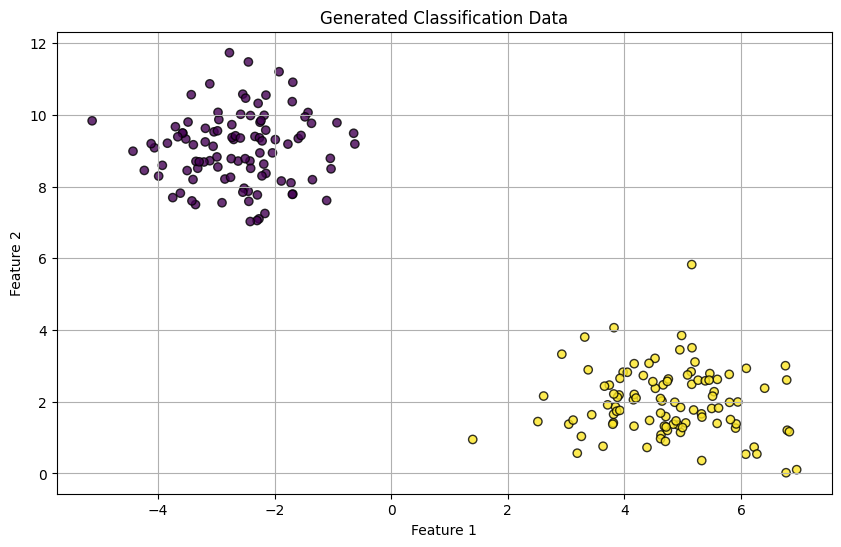

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 生成数据
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title("Generated Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [12]:
# 实例化模型
classifier = LogisticRegression(learning_rate=0.05, n_iters=1000)

# 训练模型
classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = classifier.predict(X_test)

# 计算准确率
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

acc = accuracy(y_test, y_pred)
print("\n--- Training Finished ---")
print(f"Accuracy: {acc:.4f}")

Iteration 100/1000, Cost: 0.0171
Iteration 200/1000, Cost: 0.0094
Iteration 300/1000, Cost: 0.0066
Iteration 400/1000, Cost: 0.0052
Iteration 500/1000, Cost: 0.0043
Iteration 600/1000, Cost: 0.0037
Iteration 700/1000, Cost: 0.0033
Iteration 800/1000, Cost: 0.0029
Iteration 900/1000, Cost: 0.0027
Iteration 1000/1000, Cost: 0.0025

--- Training Finished ---
Accuracy: 1.0000


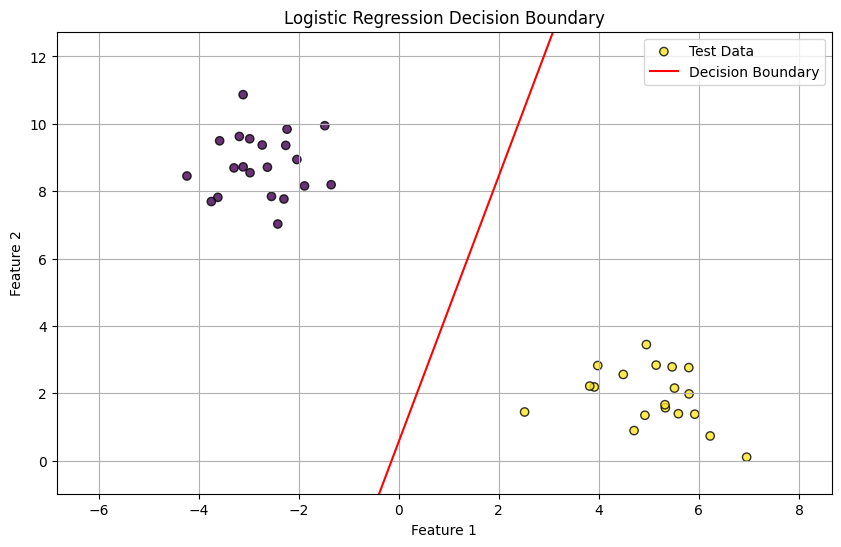

In [13]:
# 绘制决策边界
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', alpha=0.8, label='Test Data')

# 计算决策边界的线
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 从 w1*x1 + w2*x2 + b = 0 导出 x2
# x2 = -(w1*x1 + b) / w2
x1_boundary = np.array([x1_min, x1_max])
x2_boundary = -(classifier.weights[0] * x1_boundary + classifier.bias) / classifier.weights[1]

plt.plot(x1_boundary, x2_boundary, 'r-', label='Decision Boundary')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.ylim(x2_min, x2_max) # 设置y轴范围
plt.show()

Absolutely. Here is the step-by-step derivation for the partial derivatives of the **Binary Cross-Entropy (BCE)** cost function used in logistic regression.

The goal is to find $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ so we can use them in the gradient descent update rule. We will rely heavily on the **chain rule** of calculus.

### 1. The Core Formulas

Let's restate our key equations. For a single training example $(x, y)$:

* **Linear Combination ($z$)**:
    $z = w \cdot x + b$

* **Hypothesis / Sigmoid Function ($h$)**:
    $h(x) = g(z) = \frac{1}{1 + e^{-z}}$

* **Binary Cross-Entropy Cost ($J$)**:
    $J = -[y \log(h) + (1 - y) \log(1-h)]$

### 2. Preliminary Step: The Derivative of the Sigmoid

A crucial piece of this puzzle is the derivative of the sigmoid function, $g'(z)$. Let's derive it first.

1.  Rewrite $g(z)$ using a negative exponent:
    $g(z) = (1 + e^{-z})^{-1}$

2.  Apply the chain rule: $[f(u)]' = f'(u) \cdot u'$
    $g'(z) = -1 \cdot (1 + e^{-z})^{-2} \cdot (e^{-z} \cdot -1)$

3.  Simplify the expression:
    $g'(z) = \frac{e^{-z}}{(1 + e^{-z})^2}$

4.  Now, a clever trick to get a cleaner form. We can rewrite the numerator:
    $g'(z) = \frac{1 + e^{-z} - 1}{(1 + e^{-z})^2} = \frac{1 + e^{-z}}{(1 + e^{-z})^2} - \frac{1}{(1 + e^{-z})^2}$

5.  This simplifies to:
    $g'(z) = \frac{1}{1 + e^{-z}} - \left(\frac{1}{1 + e^{-z}}\right)^2$

6.  Recognize that $\frac{1}{1 + e^{-z}}$ is just $g(z)$:
    $$g'(z) = g(z) - g(z)^2 = g(z)(1 - g(z))$$

This elegant result, $\frac{\partial h}{\partial z} = h(1-h)$, is the key that unlocks the rest of the derivation.

### 3. Partial Derivative with respect to Weight ($w$)

We want to find $\frac{\partial J}{\partial w}$. The chain of dependencies is $J \rightarrow h \rightarrow z \rightarrow w$. So, we apply the chain rule:

$$\frac{\partial J}{\partial w} = \frac{\partial J}{\partial h} \cdot \frac{\partial h}{\partial z} \cdot \frac{\partial z}{\partial w}$$

Let's calculate each piece for a single feature $x_j$ and its corresponding weight $w_j$.

* **Part 1: $\frac{\partial J}{\partial h}$**
    $J = -[y \log(h) + (1-y) \log(1-h)]$
    $\frac{\partial J}{\partial h} = -\left[ \frac{y}{h} + (1-y)\frac{-1}{1-h} \right] = -\left[ \frac{y}{h} - \frac{1-y}{1-h} \right]$
    $\frac{\partial J}{\partial h} = -\frac{y(1-h) - h(1-y)}{h(1-h)} = -\frac{y - yh - h + yh}{h(1-h)} = \frac{h - y}{h(1-h)}$

* **Part 2: $\frac{\partial h}{\partial z}$**
    As we derived in the preliminary step:
    $\frac{\partial h}{\partial z} = h(1-h)$

* **Part 3: $\frac{\partial z}{\partial w_j}$**
    $z = w_1x_1 + \dots + w_jx_j + \dots + b$
    $\frac{\partial z}{\partial w_j} = x_j$

**Putting It All Together:**

Now, we multiply the three parts:

$\frac{\partial J}{\partial w_j} = \left( \frac{h-y}{h(1-h)} \right) \cdot \left( h(1-h) \right) \cdot \left( x_j \right)$

The $(h(1-h))$ terms cancel out perfectly!

$\frac{\partial J}{\partial w_j} = (h - y)x_j$

### 4. Generalizing for the Entire Dataset

To get the gradient for the entire dataset of $m$ samples, we average the gradients from each sample:

$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) x^{(i)}$$

This can be written in vectorized form as:

$$\frac{\partial J}{\partial w} = \frac{1}{m} X^T (h(X) - y)$$

### 5. Partial Derivative with respect to Bias ($b$)

The process for the bias term $b$ is almost identical. The first two parts of the chain rule are the same.

$\frac{\partial J}{\partial b} = \frac{\partial J}{\partial h} \cdot \frac{\partial h}{\partial z} \cdot \frac{\partial z}{\partial b}$

The only difference is the last part:
* **$\frac{\partial z}{\partial b}$**: Since $z = w \cdot x + b$, the derivative with respect to $b$ is simply **1**.

Therefore, for a single sample:
$\frac{\partial J}{\partial b} = (h - y)$

And for the entire dataset:
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})$$

Remarkably, the final gradient formulas for logistic regression are identical in form to those for linear regression. The only difference is that the hypothesis $h(x)$ is now the sigmoid function's output, not a simple linear one.